# PHY 266 HW 8

In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import glob
import astropy.units as u

from matplotlib.patches import Ellipse
from math import pi
from scipy import special
from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import FlatLambdaCDM 

## Prb 1.

## Prb 2. Marginalizing, priors, and dark energy.

### 2 a)

In [2]:
data = np.loadtxt('../data/hw8-supernova-catalog.txt')
z = data[:,0]
DM = data[:,1]*u.mag
sigma = data[:,2]
n = len(z)

In [5]:
num_H1 = 101    # number of points in the H axis of the grid
num_Om1 = 100    # number of points in the Omega_m axis of the grid

H_vals1 = np.linspace(40, 100, num_H1)
Om_vals1 = np.linspace(0.0,1.0,num_Om1)

log_L1 = np.zeros((num_H1, num_Om1))

for i, HO in enumerate(H_vals1):
    for j, Om in enumerate(Om_vals1):
        cosmo = FlatLambdaCDM(H0=HO * u.km / u.s / u.Mpc, Om0=Om)
        #print(cosmo)
        DM_model = cosmo.distmod(z)
        #print(DM_model[20:30])
        chi2 = np.sum(((DM - DM_model) / sigma).value**2)
        #print(0.5*chi2)
        log_L1[i][j] = -0.5*chi2

Text(0.5, 0, '$\\Omega_{m0}$')

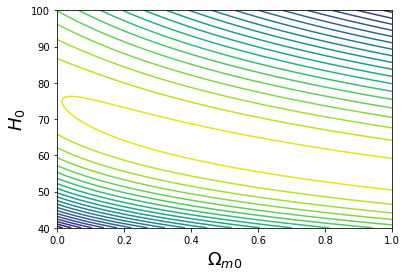

In [9]:
X,Y = np.meshgrid(Om_vals1, H_vals1)

plt.contour(X,Y,log_L1,20)
#plt.colorbar()
plt.ylabel(r'$H_0$', fontdict={'fontsize':18})
plt.xlabel(r'$\Omega_{m0}$', fontdict={'fontsize':18})

### 2 b)

In [14]:
L_for_Om = np.exp(log_L1 - log_L1.max()).sum(axis=0)  # marginalized log likelihood for Omega_m
L_for_H = np.exp(log_L1 - log_L1.max()).sum(axis=1)

Text(0, 0.5, '$\\mathcal{L}$')

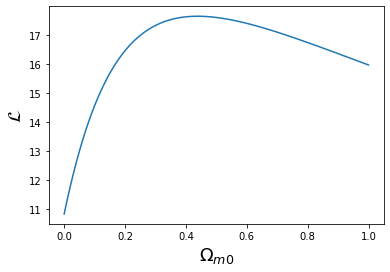

In [16]:
plt.plot(Om_vals1, L_for_Om)
plt.xlabel(r'$\Omega_{m0}$', fontdict={'fontsize':18})
plt.ylabel(r'$\mathcal{L}$', fontdict={'fontsize':18})

### This marginal likelihood plot and the contour plot above don't bound the $\Omega_m$  parameter from up well. So we cann't definitely say that this data set favors dark energy. 

### 2 c) 

In [25]:
## Gaussian prior for H_0

H_prior = sp.norm.pdf(H_vals1, loc=72, scale=8)

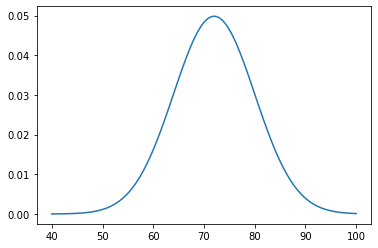

In [26]:
plt.plot(H_vals1, H_prior)

In [36]:
## cast H_prior to the shape of likelihood

H_prior_grid = np.tile(H_prior, (H_prior.shape[0]-1, 1)).T

In [39]:
H_prior_grid.shape

(101, 100)

In [41]:
post_likelihood = np.exp(log_L1) * H_prior_grid

Text(0.5, 0, '$\\Omega_{m0}$')

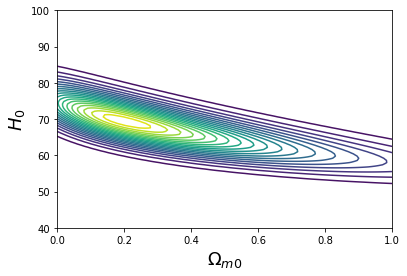

In [42]:
plt.contour(X,Y, post_likelihood,20)
#plt.colorbar()
plt.ylabel(r'$H_0$', fontdict={'fontsize':18})
plt.xlabel(r'$\Omega_{m0}$', fontdict={'fontsize':18})

### 2 d)

In [52]:
Lk_for_Om = post_likelihood.sum(axis=0)  # marginalized log likelihood for Omega_m
Lk_for_H = post_likelihood.sum(axis=1)

Text(0, 0.5, '$\\mathcal{L}$')

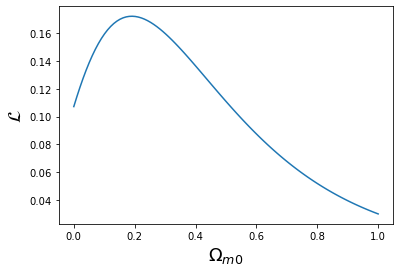

In [53]:
plt.plot(Om_vals1, Lk_for_Om)
plt.xlabel(r'$\Omega_{m0}$', fontdict={'fontsize':18})
plt.ylabel(r'$\mathcal{L}$', fontdict={'fontsize':18})